<a href="https://colab.research.google.com/github/moxie77/SOM/blob/main/SOM_bank_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications (4).csv


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [29]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [30]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [31]:
X = dataset.drop(labels='Class',axis=1)

In [32]:
X = X.values

In [33]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [34]:
y = dataset['Class']

In [35]:
y = y.values

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
Scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
X = Scaler.fit_transform(X)

In [40]:
from minisom import MiniSom

In [41]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.)

In [42]:
som.random_weights_init(data=X)
som.train_random(data=X, num_iteration=100)

In [43]:
from pylab import bone, pcolor, colorbar, plot, show

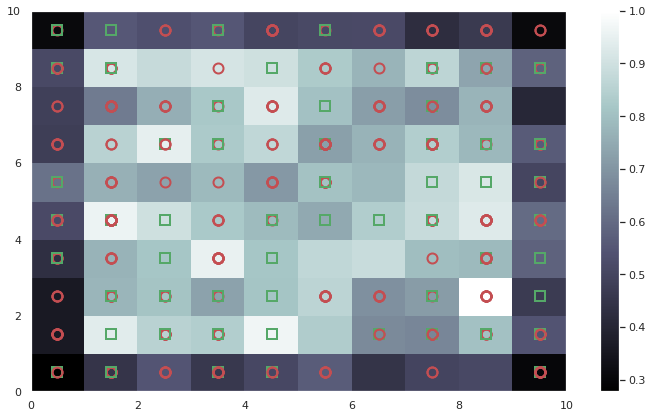

In [48]:
fig = plt.figure(figsize=(12,7))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2) 
  
show()

In [49]:
mappings = som.win_map(X)

In [55]:
frauds = np.concatenate((mappings[(8,2)],mappings[(3,3)]),axis=0)
frauds = Scaler.inverse_transform(frauds)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15719940.0,0.0,35.17,3.750,2.0,1.0,1.0,0.000,0.0,1.0,6.0,0.0,2.0,0.0,201.0
1,15711742.0,0.0,23.00,1.835,2.0,5.0,3.0,0.000,0.0,1.0,1.0,0.0,2.0,200.0,54.0
2,15761733.0,0.0,16.08,0.335,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,160.0,127.0
3,15770995.0,0.0,40.33,8.125,1.0,4.0,4.0,0.165,0.0,1.0,2.0,0.0,2.0,184.0,19.0
4,15736399.0,0.0,36.58,0.290,2.0,1.0,1.0,0.000,0.0,1.0,10.0,0.0,2.0,200.0,19.0
5,15766734.0,0.0,27.17,1.250,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,92.0,301.0
6,15667934.0,0.0,57.58,2.000,2.0,1.0,1.0,6.500,0.0,1.0,1.0,0.0,2.0,0.0,11.0
7,15648069.0,0.0,24.50,1.750,1.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,132.0,1.0
8,15593959.0,0.0,21.75,1.750,1.0,5.0,3.0,0.000,0.0,0.0,0.0,0.0,2.0,160.0,1.0
9,15629750.0,0.0,24.33,2.500,1.0,3.0,5.0,4.500,0.0,0.0,0.0,0.0,2.0,200.0,457.0
